In [145]:
import numpy as np
import pandas as pd

In [146]:
train_set = pd.read_csv('../../Datasets/weatherHistory/weatherHistory_Train.csv')
test_set = pd.read_csv('../../Datasets/weatherHistory/weatherHistory_Test.csv')

In [147]:
test_set

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2013-05-20 06:00:00.000 +0200,Partly Cloudy,rain,13.800000,0.77,12.3809,211.0,11.2056,0.0,1013.92,Partly cloudy throughout the day.
1,2013-05-20 07:00:00.000 +0200,Partly Cloudy,rain,14.933333,0.72,11.2056,230.0,11.2056,0.0,1014.46,Partly cloudy throughout the day.
2,2013-05-20 08:00:00.000 +0200,Partly Cloudy,rain,16.872222,0.64,14.0714,233.0,10.3523,0.0,1014.91,Partly cloudy throughout the day.
3,2013-05-20 09:00:00.000 +0200,Mostly Cloudy,rain,17.800000,0.64,12.8800,233.0,10.0464,0.0,1015.25,Partly cloudy throughout the day.
4,2013-05-20 10:00:00.000 +0200,Mostly Cloudy,rain,18.933333,0.56,20.3987,250.0,11.2700,0.0,1015.26,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
28931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
28932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
28933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
28934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [148]:
train_set.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [149]:
test_set.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               374
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [150]:
# filing NAN values

def replace_categorical_null(cols: list, dataset: pd.DataFrame):
    for col in cols:
        temp = dataset[col].dropna()
        mode = temp.mode()[0]
        dataset[col].fillna(mode, inplace=True)

na_cols = list(train_set.columns[train_set.isnull().any()])
replace_categorical_null(na_cols, train_set)

na_cols_test = list(test_set.columns[test_set.isnull().any()])
replace_categorical_null(na_cols_test, test_set)

In [151]:
# Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder

def encode_labels(cols: list, dataset: pd.DataFrame, source: pd.DataFrame):
    encoder = LabelEncoder()
    for col in cols:
        encoder.fit(source[col])
        dataset[col] = pd.DataFrame(encoder.fit_transform(dataset[col]))


# train_categorical_cols = list(train_set.select_dtypes(include=['object']).dtypes.index)
train_categorical_cols = ['Summary', 'Precip Type', 'Daily Summary']
test_categorical_cols = ['Summary', 'Precip Type', 'Daily Summary']

all_data = pd.concat([train_set[train_categorical_cols] , test_set[test_categorical_cols]])

encode_labels(train_categorical_cols, train_set, all_data)
encode_labels(test_categorical_cols, test_set, all_data)

In [152]:
train_set

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,169
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,169
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,169
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,169
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,169
...,...,...,...,...,...,...,...,...,...,...,...,...
67512,2013-05-20 01:00:00.000 +0200,17,0,17.594444,17.594444,0.84,10.6421,279.0,9.9820,0.0,1010.25,169
67513,2013-05-20 02:00:00.000 +0200,19,0,17.566667,17.566667,0.80,13.5723,269.0,11.0285,0.0,1011.30,169
67514,2013-05-20 03:00:00.000 +0200,19,0,17.000000,17.000000,0.81,14.0392,260.0,15.8263,0.0,1011.82,169
67515,2013-05-20 04:00:00.000 +0200,19,0,15.355556,15.355556,0.78,14.0231,250.0,15.8263,0.0,1011.83,169


In [153]:
train_set = train_set.drop(columns='Formatted Date')
test_set = test_set.drop(columns='Formatted Date')
#set the date format for 'Formatted Data' column
# from datetime import datetime as dt
#
# formate = '%Y-%m-%d %H:%M:%S.%f %z'
# train_set['Formatted Date'] = train_set['Formatted Date'].map(lambda x: dt.strptime(x, formate))
# test_set['Formatted Date'] = test_set['Formatted Date'].map(lambda x: dt.strptime(x, formate))

In [154]:
# Extraction Of Data & time Features

# train_set['month'] = train_set['Formatted Date'].map(lambda data: data.month)
# test_set['month'] = test_set['Formatted Date'].map(lambda data: data.month)
#
# train_set = train_set.drop(columns='Formatted Date')
# test_set = test_set.drop(columns='Formatted Date')

Text(79.125, 0.5, 'Variable 1')

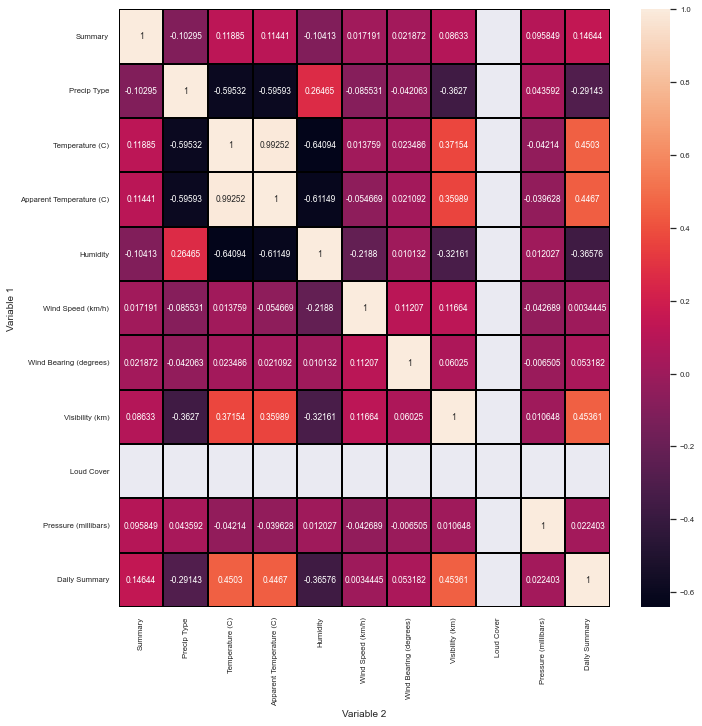

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(len(train_set.columns), len(train_set.columns)), facecolor='w', edgecolor='k')
sns.set(font_scale=0.7)
sns.heatmap(train_set.corr(),
            annot=True,
            fmt='.5g',
            linewidths=2,
            linecolor='black')
plt.xlabel('Variable 2',fontsize=10)
plt.ylabel('Variable 1',fontsize=10)

In [156]:
train_set = train_set.drop(columns=['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Summary', 'Loud Cover'])
test_set = test_set.drop(columns=['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Summary', 'Loud Cover'])

In [157]:
train_set

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary
0,0,9.472222,7.388889,0.89,15.8263,169
1,0,9.355556,7.227778,0.86,15.8263,169
2,0,9.377778,9.377778,0.89,14.9569,169
3,0,8.288889,5.944444,0.83,15.8263,169
4,0,8.755556,6.977778,0.83,15.8263,169
...,...,...,...,...,...,...
67512,0,17.594444,17.594444,0.84,9.9820,169
67513,0,17.566667,17.566667,0.80,11.0285,169
67514,0,17.000000,17.000000,0.81,15.8263,169
67515,0,15.355556,15.355556,0.78,15.8263,169


In [158]:
# splitting Data
y_train = train_set['Apparent Temperature (C)']


x_train = train_set.drop(columns='Apparent Temperature (C)')
x_test = test_set

In [159]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [160]:
#training model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [161]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = reg.predict(x_train)

mse_error = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse_error)
r2_error = r2_score(y_train, y_train_pred)

errors = pd.DataFrame({'Value': [mse_error, rmse, r2_error]}, index=['MSE', 'RMSE', 'R2'])
errors

,Value
MSE,1.694439
RMSE,1.301706
R2,0.986190


In [162]:
y_test_pred = reg.predict(x_test)
y_test_pred

array([12.70641437, 14.06269559, 16.41430008, ..., 22.8112217 ,
       22.23462761, 20.85870086])

In [163]:
#Save Predictions
prediction = pd.DataFrame(y_test_pred, columns=['Apparent Temperature (C)'])
prediction.to_csv('../../weather_pred.csv', index=False)